In [1]:
# !pip install wordcloud

In [ ]:
# https://github.com/yamanalab/ec-darkpattern/blob/master/dataset/dataset.tsv

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [3]:
df = pd.read_csv('dataset.csv')
df

,text,label
0,FLASH SALE | LIMITED TIME ONLY Shop Now,1
1,Pillowcases & Shams,0
2,Write a review,0
3,"To start your return, simply click on the foll...",0
4,newsletter signup (privacy policy),0
...,...,...
2349,Bra Panty Set,0
2350,DressesFootwearHatsHoodies & SweatshirtsJersey...,0
2351,Only 4 left in stock,1
2352,Trending Players,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2354 non-null   object
 1   label   2354 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 36.9+ KB


In [5]:
df['label'].value_counts()

label
0    1178
1    1176
Name: count, dtype: int64

In [6]:
df.describe()

,label
count,2354.000000
mean,0.499575
std,0.500106
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
df.groupby('label').describe().T

label                          0                                        1
text count                  1178                                     1176
     unique                 1178                                     1176
     top     Pillowcases & Shams  FLASH SALE | LIMITED TIME ONLY Shop Now
     freq                      1                                        1

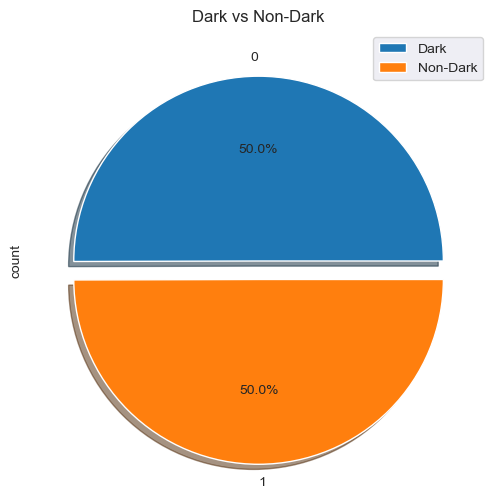

In [8]:
df["label"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Dark vs Non-Dark")
plt.legend(["Dark", "Non-Dark"])
plt.show()

In [9]:
def text_preprocess(txt):
    nopunc = [char for char in txt if char not in string.punctuation]

    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()
    
    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]
    
    return nostop

In [10]:
df

,text,label
0,FLASH SALE | LIMITED TIME ONLY Shop Now,1
1,Pillowcases & Shams,0
2,Write a review,0
3,"To start your return, simply click on the foll...",0
4,newsletter signup (privacy policy),0
...,...,...
2349,Bra Panty Set,0
2350,DressesFootwearHatsHoodies & SweatshirtsJersey...,0
2351,Only 4 left in stock,1
2352,Trending Players,0


In [11]:
dark = df[df["label"] == 1]["text"]
ndark = df[df["label"] == 0]["text"]
print("dark : ",len(dark))
print("non dark : ",len(ndark))

dark :  1176
non dark :  1178


In [12]:
dark

0                 FLASH SALE | LIMITED TIME ONLY Shop Now
5                                               In demand
7                             Hurry! Only 2 left in stock
8                                    In Stock only 3 left
11                                     Hurry! Only 2 left
                              ...                        
2343                  No thanks, I like paying full price
2347                                          ONLY 9 LEFT
2348    No Thanks, I don't want official software at t...
2351                                 Only 4 left in stock
2353                                     10 Left in stock
Name: text, Length: 1176, dtype: object

In [13]:
dark_words = text_preprocess(dark)

In [14]:
dark_words[0:15]

['flash',
 'sale',
 'limited',
 'time',
 'shop',
 'nowin',
 'left',
 'stockin',
 'stock',
 'leftonly',
 'leftour',
 'best',
 'selling',
 'people',
 'added']

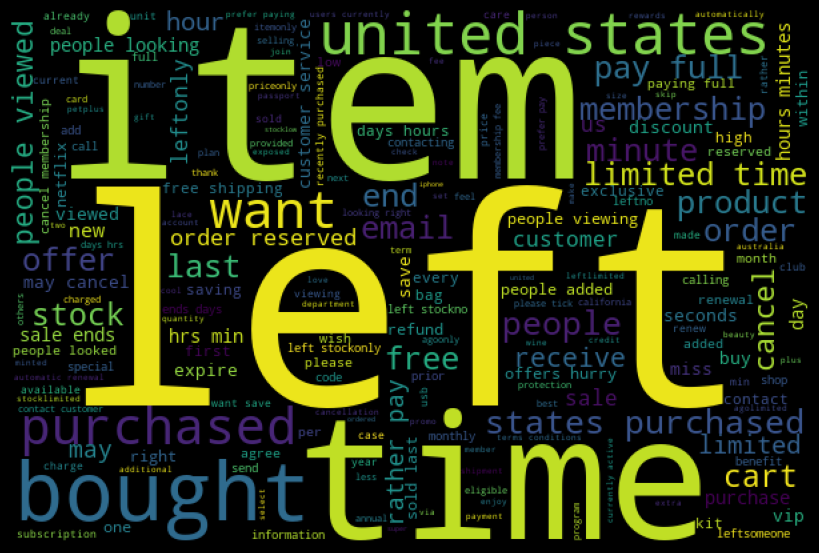

In [15]:
dark_wordcloud = WordCloud(width=600, height=400).generate(' '.join(dark_words))
plt.figure( figsize=(8,6), facecolor='k')
plt.imshow(dark_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [16]:
print("Top 10 dark words:\n")
print(pd.Series(dark_words).value_counts().head(10))

Top 10 dark words:

left         144
people        95
time          82
purchased     78
bought        57
united        52
states        49
like          46
want          45
full          44
Name: count, dtype: int64


In [17]:
ndark_words = text_preprocess(ndark)

In [18]:
ndark_words[:15]

['pillowcases',
 'shamswrite',
 'reviewto',
 'start',
 'simply',
 'click',
 'following',
 'button',
 'add',
 'return',
 'form',
 'receive',
 'email',
 'shipping',
 'instructions']

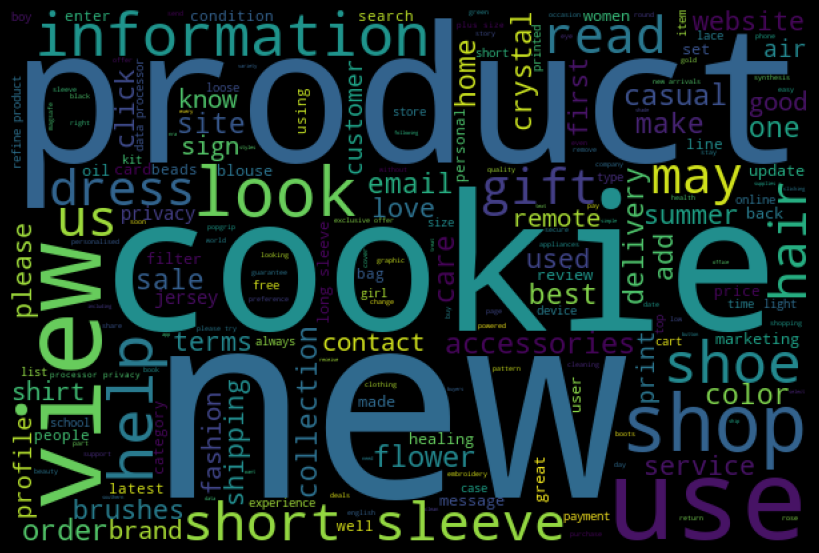

In [19]:
ndark_wordcloud = WordCloud(width=600, height=400).generate(' '.join(ndark_words))
plt.figure( figsize=(8,6), facecolor='k')
plt.imshow(ndark_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [20]:
print("Top 10 Non dark words are :\n")
print(pd.Series(ndark_words).value_counts().head(10))

Top 10 Non dark words are :

new            25
view           24
shop           21
cookies        21
use            20
sleeve         19
product        16
products       14
short          12
information    12
Name: count, dtype: int64


In [21]:
df["text"] = df["text"].apply(text_preprocess)

In [22]:
df

,text,label
0,"[flash, sale, limited, time, shop]",1
1,"[pillowcases, shams]",0
2,"[write, review]",0
3,"[start, return, simply, click, following, butt...",0
4,"[newsletter, signup, privacy, policy]",0
...,...,...
2349,"[bra, panty, set]",0
2350,"[dressesfootwearhatshoodies, sweatshirtsjersey...",0
2351,"[left, stock]",1
2352,"[trending, players]",0


In [23]:
import gensim

In [24]:
from gensim import models

In [25]:
vector_size_n_w2v = 5

w2v_model = gensim.models.Word2Vec(vector_size=vector_size_n_w2v,
                     window=3,
                     min_count=1,
                     sg=0) # 0=CBOW, 1=Skip-gram

print(w2v_model)

Word2Vec<vocab=0, vector_size=5, alpha=0.025>


In [26]:
w2v_model.build_vocab(df['text'])
print(w2v_model)

Word2Vec<vocab=3440, vector_size=5, alpha=0.025>


In [27]:
w2v_model.train(df['text'], 
                total_examples=w2v_model.corpus_count, 
                epochs=5)

(46919, 53520)

In [28]:
len(w2v_model.wv.index_to_key)

3440

In [29]:
words = set(w2v_model.wv.index_to_key)

def get_word_vectors(words_list, model, max_length):
    vectors = [model.wv[i] for i in words_list if i in words]
    while len(vectors) < max_length:
        vectors.append(np.zeros(model.vector_size))
    return np.array(vectors)

MAX_LENGTH = 100

df['w2v'] = df['text'].apply(lambda x: get_word_vectors(x, w2v_model, MAX_LENGTH))

df['w2v'] = df['w2v'].apply(lambda x: x.flatten()) 

In [30]:
df

,text,label,w2v
0,"[flash, sale, limited, time, shop]",1,"[-0.016752835363149643, 0.18216869235038757, 0..."
1,"[pillowcases, shams]",0,"[0.030089180916547775, -0.15937481820583344, -..."
2,"[write, review]",0,"[-0.18647146224975586, -0.020141247659921646, ..."
3,"[start, return, simply, click, following, butt...",0,"[-0.031992364674806595, -0.16115424036979675, ..."
4,"[newsletter, signup, privacy, policy]",0,"[-0.16630816459655762, -0.039996493607759476, ..."
...,...,...,...
2349,"[bra, panty, set]",0,"[-0.08529224246740341, -0.03838337957859039, -..."
2350,"[dressesfootwearhatshoodies, sweatshirtsjersey...",0,"[-0.1689862459897995, 0.006373118609189987, -0..."
2351,"[left, stock]",1,"[-0.018729697912931442, 0.005683399736881256, ..."
2352,"[trending, players]",0,"[-0.12309486418962479, 0.1120280921459198, -0...."


In [31]:
df1 = pd.DataFrame(df['w2v'].tolist(), columns=[f'w2v_{i+1}' for i in range(len(df['w2v'].iloc[0]))])
df1

,w2v_1,w2v_2,w2v_3,w2v_4,w2v_5,w2v_6,w2v_7,w2v_8,w2v_9,w2v_10,...,w2v_491,w2v_492,w2v_493,w2v_494,w2v_495,w2v_496,w2v_497,w2v_498,w2v_499,w2v_500
0,-0.016753,0.182169,0.099803,0.099379,-0.023494,0.182497,-0.178310,0.036789,0.027150,-0.001778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.030089,-0.159375,-0.080031,-0.115083,0.162806,0.114998,-0.047949,0.013221,0.131709,0.135966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.186471,-0.020141,-0.151397,0.054899,-0.053150,0.173105,-0.085597,-0.129655,0.150592,0.075786,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.031992,-0.161154,0.012739,0.033132,-0.047019,-0.037869,-0.192602,0.104347,-0.121932,0.099587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.166308,-0.039996,0.186208,-0.105086,0.020638,0.003550,0.146549,0.084094,0.161783,0.177767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,-0.085292,-0.038383,-0.121978,0.018939,-0.172098,0.166057,-0.163939,0.103178,-0.102772,0.158689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2350,-0.168986,0.006373,-0.020589,0.097261,-0.180665,-0.177972,0.068122,0.005213,-0.140268,-0.000456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2351,-0.018730,0.005683,0.109498,0.173989,-0.203982,-0.156467,0.124106,0.223801,-0.093141,-0.080267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2352,-0.123095,0.112028,-0.133144,-0.109873,0.072774,0.038309,0.135615,-0.127800,-0.091544,-0.052711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# SVC

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df1
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7791932059447984


In [33]:
def preprocess_sentence(sentence):
    tokens = word_tokenize(sentence)

    tokens = [word for word in tokens if word.isalnum()]

    tokens = [word.lower() for word in tokens]

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

def get_word_vectors(words_list, model, max_length):
    vectors = [model.wv[i] for i in words_list if i in model.wv]
    while len(vectors) < max_length:
        vectors.append(np.zeros(model.vector_size))
    return np.array(vectors)

def predict_class_for_sentence(sentence, w2v_model, svm_model, max_length):
    processed_sentence = preprocess_sentence(sentence)

    sentence_w2v = get_word_vectors(processed_sentence, w2v_model, max_length)
    sentence_w2v = sentence_w2v.flatten().reshape(1, -1)

    prediction = svm_model.predict(sentence_w2v)

    return prediction[0]

# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.8471337579617835


# XGBoost

In [35]:
# !pip install xgboost

In [36]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

XGBoost Accuracy: 0.8895966029723992


In [37]:
input_sentence = "hurry offer ends today"
# change model
predicted_class = predict_class_for_sentence(input_sentence, w2v_model, xgb_model, MAX_LENGTH)
print(f"Predicted class for the input sentence: {predicted_class}")

Predicted class for the input sentence: 1


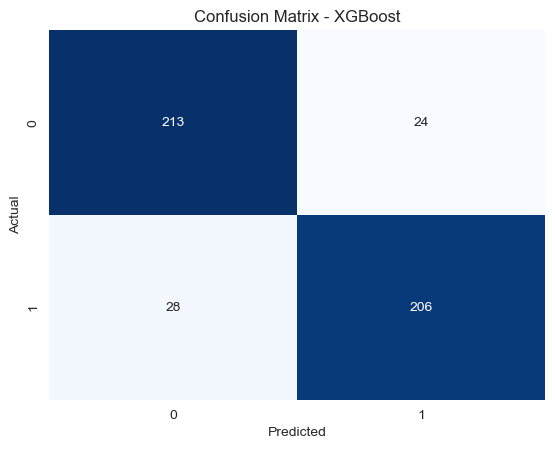

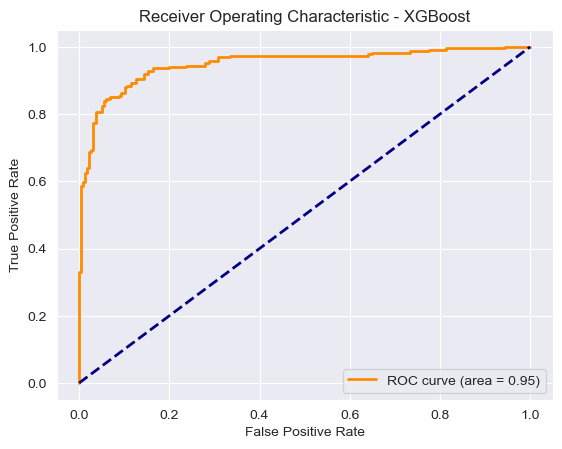

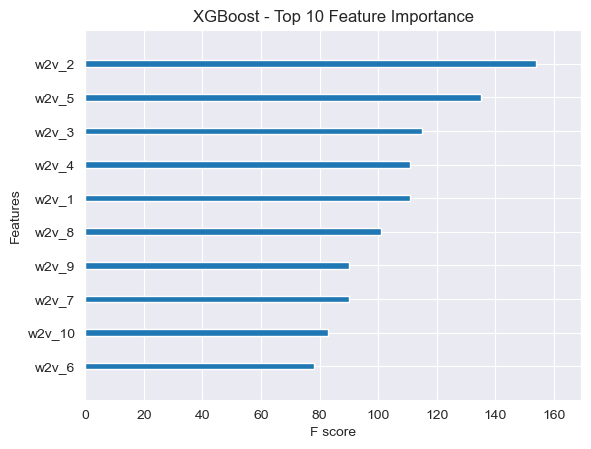

In [38]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc='lower right')
plt.show()

# Feature Importance Plot
from xgboost import plot_importance

plot_importance(xgb_model, max_num_features=10, importance_type='weight', show_values=False)
plt.title('XGBoost - Top 10 Feature Importance')
plt.show()